In [1]:
import numpy as np
import pandas as pd
import datetime
import operator
import random
import math
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('seaborn')
%matplotlib inline

In [2]:
df_confirmed = pd.read_csv('State_Wise_Confirmed_Final.csv')
df_deaths = pd.read_csv('State_Wise_Deaths_Final.csv')
df_recovered = pd.read_csv('State_Wise_Recovered_Final.csv')

In [3]:
df_confirmed.head()

,State,Country/Region,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,...,27-Apr-20,28-Apr-20,29-Apr-20,30-Apr-20,01-May-20,02-May-20,03-May-20,04-May-20,05-May-20,06-May-20
0,AN,India,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
1,AP,India,1,1,1,1,1,3,3,5,...,1177,1259,1332,1403,1463,1525,1583,1650,1717,1777
2,AR,India,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,AS,India,0,0,0,0,0,0,0,0,...,36,38,38,43,43,43,43,43,45,46
4,BR,India,0,0,0,0,0,0,0,0,...,346,366,403,425,466,481,517,528,535,542


In [4]:
df_deaths.head()

,State,Country/Region,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,...,27-Apr-20,28-Apr-20,29-Apr-20,30-Apr-20,01-May-20,02-May-20,03-May-20,04-May-20,05-May-20,06-May-20
0,AN,India,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AP,India,0,0,0,0,0,0,0,0,...,31,31,31,31,33,33,33,33,34,36
2,AR,India,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AS,India,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,BR,India,0,0,0,0,0,0,0,0,...,2,2,2,2,3,4,4,4,4,4


In [5]:
df_recovered.head()

,State,Country/Region,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,...,27-Apr-20,28-Apr-20,29-Apr-20,30-Apr-20,01-May-20,02-May-20,03-May-20,04-May-20,05-May-20,06-May-20
0,AN,India,0,0,0,0,0,0,0,0,...,11,15,15,16,16,26,32,32,32,32
1,AP,India,0,0,0,0,0,0,0,0,...,235,258,287,321,403,441,488,524,589,729
2,AR,India,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,AS,India,0,0,0,0,0,0,0,0,...,27,27,29,29,33,33,33,33,33,35
4,BR,India,0,0,0,0,0,0,0,0,...,56,64,64,84,98,117,124,127,158,188


In [6]:
cols = df_confirmed.keys()
print(cols)

confirmed = df_confirmed.loc[:, cols[2]:cols[-1]]
deaths = df_deaths.loc[:, cols[2]:cols[-1]]
recovered = df_recovered.loc[:, cols[2]:cols[-1]]

Index(['State', 'Country/Region', '14-Mar-20', '15-Mar-20', '16-Mar-20',
       '17-Mar-20', '18-Mar-20', '19-Mar-20', '20-Mar-20', '21-Mar-20',
       '22-Mar-20', '23-Mar-20', '24-Mar-20', '25-Mar-20', '26-Mar-20',
       '27-Mar-20', '28-Mar-20', '29-Mar-20', '30-Mar-20', '31-Mar-20',
       '01-Apr-20', '02-Apr-20', '03-Apr-20', '04-Apr-20', '05-Apr-20',
       '06-Apr-20', '07-Apr-20', '08-Apr-20', '09-Apr-20', '10-Apr-20',
       '11-Apr-20', '12-Apr-20', '13-Apr-20', '14-Apr-20', '15-Apr-20',
       '16-Apr-20', '17-Apr-20', '18-Apr-20', '19-Apr-20', '20-Apr-20',
       '21-Apr-20', '22-Apr-20', '23-Apr-20', '24-Apr-20', '25-Apr-20',
       '26-Apr-20', '27-Apr-20', '28-Apr-20', '29-Apr-20', '30-Apr-20',
       '01-May-20', '02-May-20', '03-May-20', '04-May-20', '05-May-20',
       '06-May-20'],
      dtype='object')


In [7]:
confirmed.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,27-Apr-20,28-Apr-20,29-Apr-20,30-Apr-20,01-May-20,02-May-20,03-May-20,04-May-20,05-May-20,06-May-20
0,0,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
1,1,1,1,1,1,3,3,5,6,7,...,1177,1259,1332,1403,1463,1525,1583,1650,1717,1777
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,36,38,38,43,43,43,43,43,45,46
4,0,0,0,0,0,0,0,0,2,3,...,346,366,403,425,466,481,517,528,535,542


In [8]:
dates = confirmed.keys()
india_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    india_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [9]:
print(confirmed_sum, recovered_sum, india_cases, mortality_rate)

53000 15335 [81, 108, 123, 134, 171, 198, 256, 334, 401, 503, 567, 657, 722, 886, 1029, 1139, 1326, 1635, 2059, 2545, 3105, 3684, 4293, 4777, 5350, 5915, 6728, 7599, 8453, 9211, 10454, 11485, 12371, 13432, 14354, 15725, 17305, 18544, 20081, 21373, 23040, 24448, 26283, 27890, 29458, 31360, 33065, 34866, 37262, 39826, 42778, 46434, 49405, 53000] [0.024691358024691357, 0.018518518518518517, 0.016260162601626018, 0.022388059701492536, 0.017543859649122806, 0.020202020202020204, 0.015625, 0.011976047904191617, 0.017456359102244388, 0.017892644135188866, 0.01763668430335097, 0.0167427701674277, 0.0221606648199446, 0.02144469525959368, 0.023323615160349854, 0.02370500438981563, 0.030165912518853696, 0.028134556574923548, 0.026711996114618747, 0.02711198428290766, 0.026731078904991948, 0.026058631921824105, 0.027486606102958305, 0.02805107808247854, 0.030093457943925234, 0.030600169061707524, 0.03373959571938169, 0.03276746940386893, 0.03430734650419969, 0.036043860601454786, 0.034340922135067

In [10]:
days_from_14_march = np.array([i for i in range(len(dates))]).reshape(-1,1)
india_cases = np.array(india_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [11]:
days_from_14_march

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [12]:
days_in_future = 10
future_forecast = np.array([i for i in range( len(dates) + days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [13]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [14]:
start = '03/14/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days = i)).strftime('%m/%d/%Y'))
    
print(future_forecast_dates)

['03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/02/2020', '04/03/2020', '04/04/2020', '04/05/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020', '04/10/2020', '04/11/2020', '04/12/2020', '04/13/2020', '04/14/2020', '04/15/2020', '04/16/2020', '04/17/2020', '04/18/2020', '04/19/2020', '04/20/2020', '04/21/2020', '04/22/2020', '04/23/2020', '04/24/2020', '04/25/2020', '04/26/2020', '04/27/2020', '04/28/2020', '04/29/2020', '04/30/2020', '05/01/2020', '05/02/2020', '05/03/2020', '05/04/2020', '05/05/2020', '05/06/2020', '05/07/2020', '05/08/2020', '05/09/2020', '05/10/2020', '05/11/2020', '05/12/2020', '05/13/2020', '05/14/2020', '05/15/2020', '05/16/2020']


In [15]:
future_date_plots = np.array(future_forecast_dates)

In [16]:
latest_confirmed = df_confirmed[dates[-1]]
latest_deaths = df_deaths[dates[-1]]
latest_recovered = df_recovered[dates[-1]]
print(latest_confirmed)
print(latest_deaths)
print(latest_recovered)

0        33
1      1777
2         1
3        46
4       542
5       124
6        59
7         1
8         0
9      5532
10        0
11     6625
12      594
13       43
14      775
15      127
16      693
17      503
18       42
19        0
20     3138
21    16758
22        2
23       12
24        1
25        0
26      205
27        9
28     1526
29     3317
30        0
31     4829
32     1107
33       64
34     2998
35       61
36     1456
Name: 06-May-20, dtype: int64
0       0
1      36
2       0
3       1
4       4
5       1
6       0
7       0
8       0
9       1
10      0
11     28
12      7
13      3
14      0
15      3
16     29
17      4
18      0
19      0
20    186
21    650
22      0
23      1
24      0
25      0
26      2
27      0
28     27
29     93
30      0
31     35
32     29
33      0
34     60
35      1
36    144
Name: 06-May-20, dtype: int64
0       32
1      729
2        1
3       35
4      188
5       21
6       36
7        0
8        0
9     1542
10       7
11   

In [17]:
countries = list(df_confirmed['Country/Region'].unique())
countries

['India']

In [18]:
# total confirmed cases for each country

country_confirmed_cases = []
no_cases = []

for i in countries:
    cases = latest_confirmed[df_confirmed['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    countries.remove(i)
    
countries = [k for k, v in sorted(zip(countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(countries)):
    country_confirmed_cases[i] = latest_confirmed[df_confirmed['Country/Region']==countries[i]].sum()
    

In [19]:
country_confirmed_cases

[53000]

In [20]:
print('{0} Total Confirmed : {1} cases'.format(countries[0],country_confirmed_cases[i]))

India Total Confirmed : 53000 cases


In [21]:
states = list(df_confirmed['State'].unique())

state_confirmed_cases = []
no_cases = []
for i in states:
    cases = latest_confirmed[df_deaths['State']==i].sum()
    if cases > 0:
        state_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    states.remove(i)

In [22]:
case_per_states = {}
for i in range(len(states)):
    case_per_states[states[i]] = state_confirmed_cases[i]
    print('{0}: {1} cases'.format(states[i],state_confirmed_cases[i]))

AN: 33 cases
AP: 1777 cases
AR: 1 cases
AS: 46 cases
BR: 542 cases
CH: 124 cases
CT: 59 cases
DN: 1 cases
DL: 5532 cases
GJ: 6625 cases
HR: 594 cases
HP: 43 cases
JK: 775 cases
JH: 127 cases
KA: 693 cases
KL: 503 cases
LA: 42 cases
MP: 3138 cases
MH: 16758 cases
MN: 2 cases
ML: 12 cases
MZ: 1 cases
OR: 205 cases
PY: 9 cases
PB: 1526 cases
RJ: 3317 cases
TN: 4829 cases
TG: 1107 cases
TR: 64 cases
UP: 2998 cases
UT: 61 cases
WB: 1456 cases


In [23]:
nan_indices = []

for i in range(len(states)):
    if type(states[i])==float:
        nan_indices.append(i)
        
states = list(states)
state_confirmed_cases = list(state_confirmed_cases)

for i in nan_indices:
    states.pop(i)
    state_confirmed_cases.pop(i)

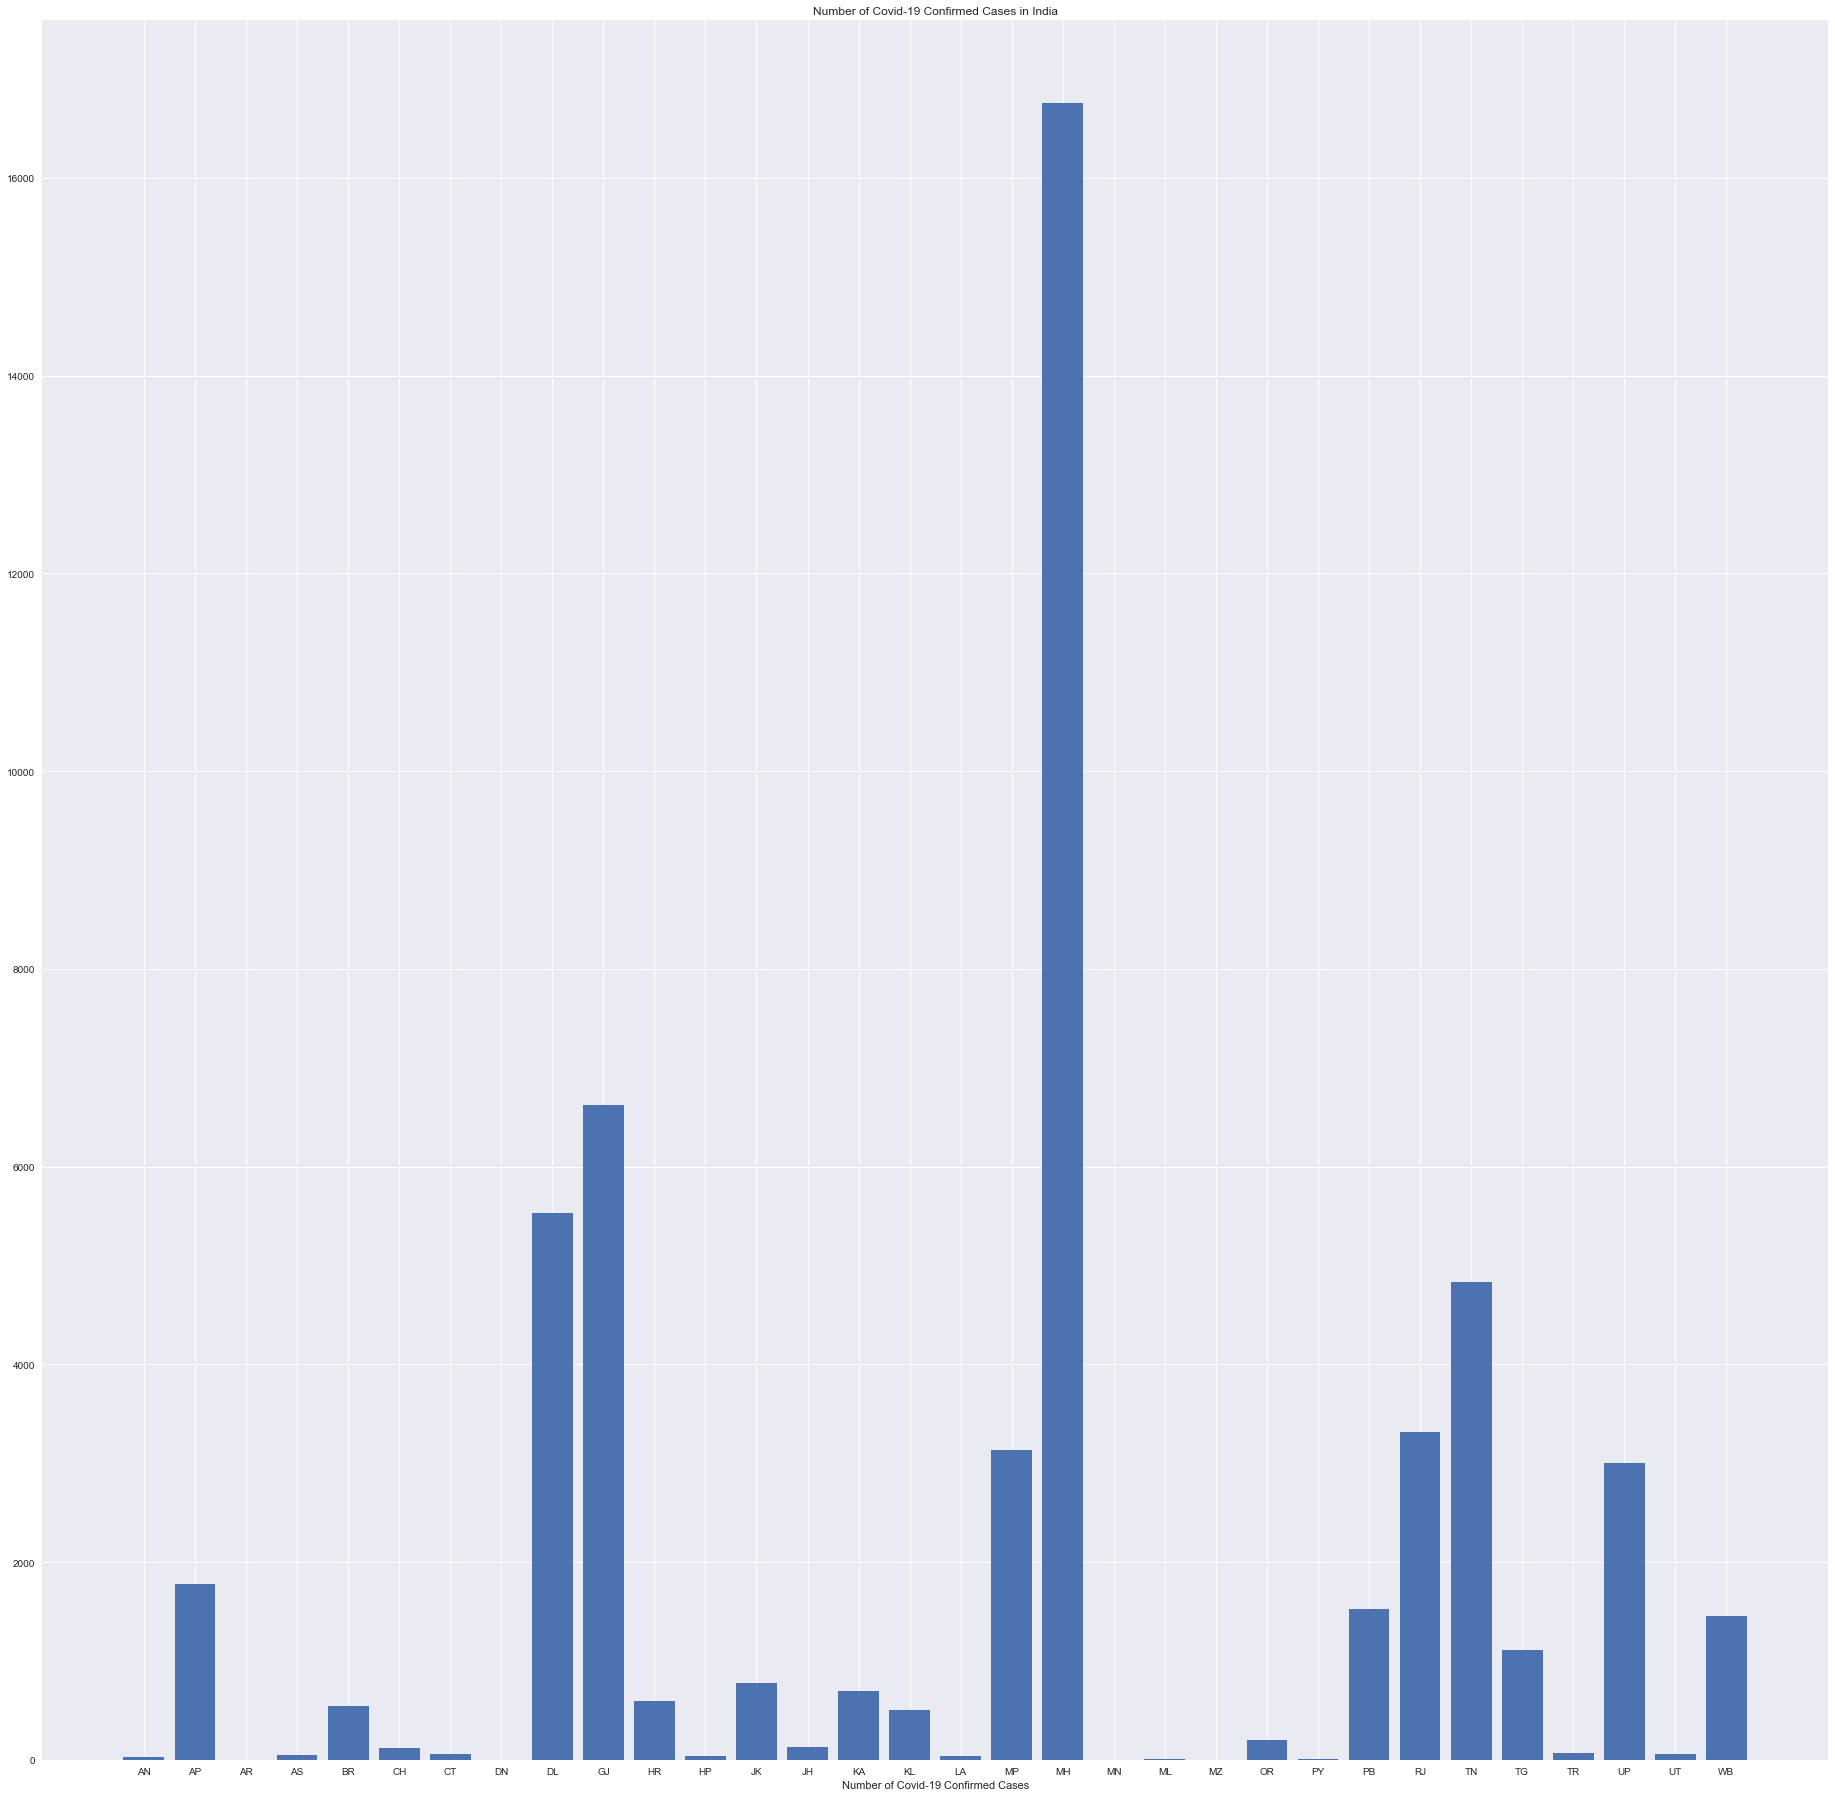

In [24]:
plt.figure(figsize = (32, 32))
plt.bar(states, state_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in India')
plt.xlabel('Number of Covid-19 Confirmed Cases')
plt.show()

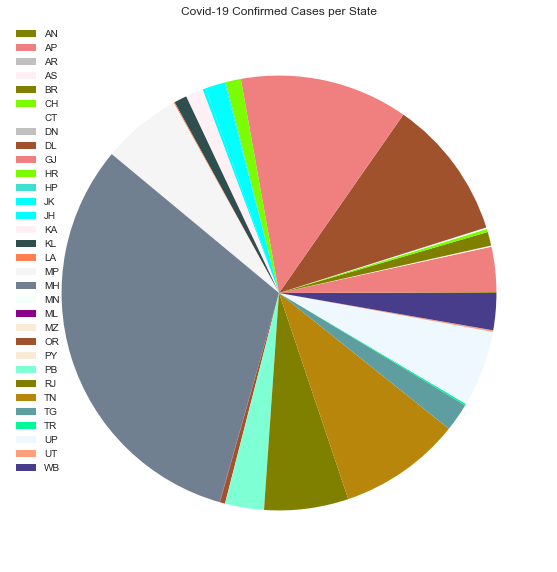

In [25]:
visual_states_cases=[]
visual_states=[]

for k,v in case_per_states.items():
    visual_states.append(k)
    visual_states_cases.append(v)
    
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(visual_states))
plt.figure(figsize=(10,10))
plt.title('Covid-19 Confirmed Cases per State')
plt.pie(visual_states_cases, colors=c)
plt.legend(visual_states, loc='best')
plt.show()

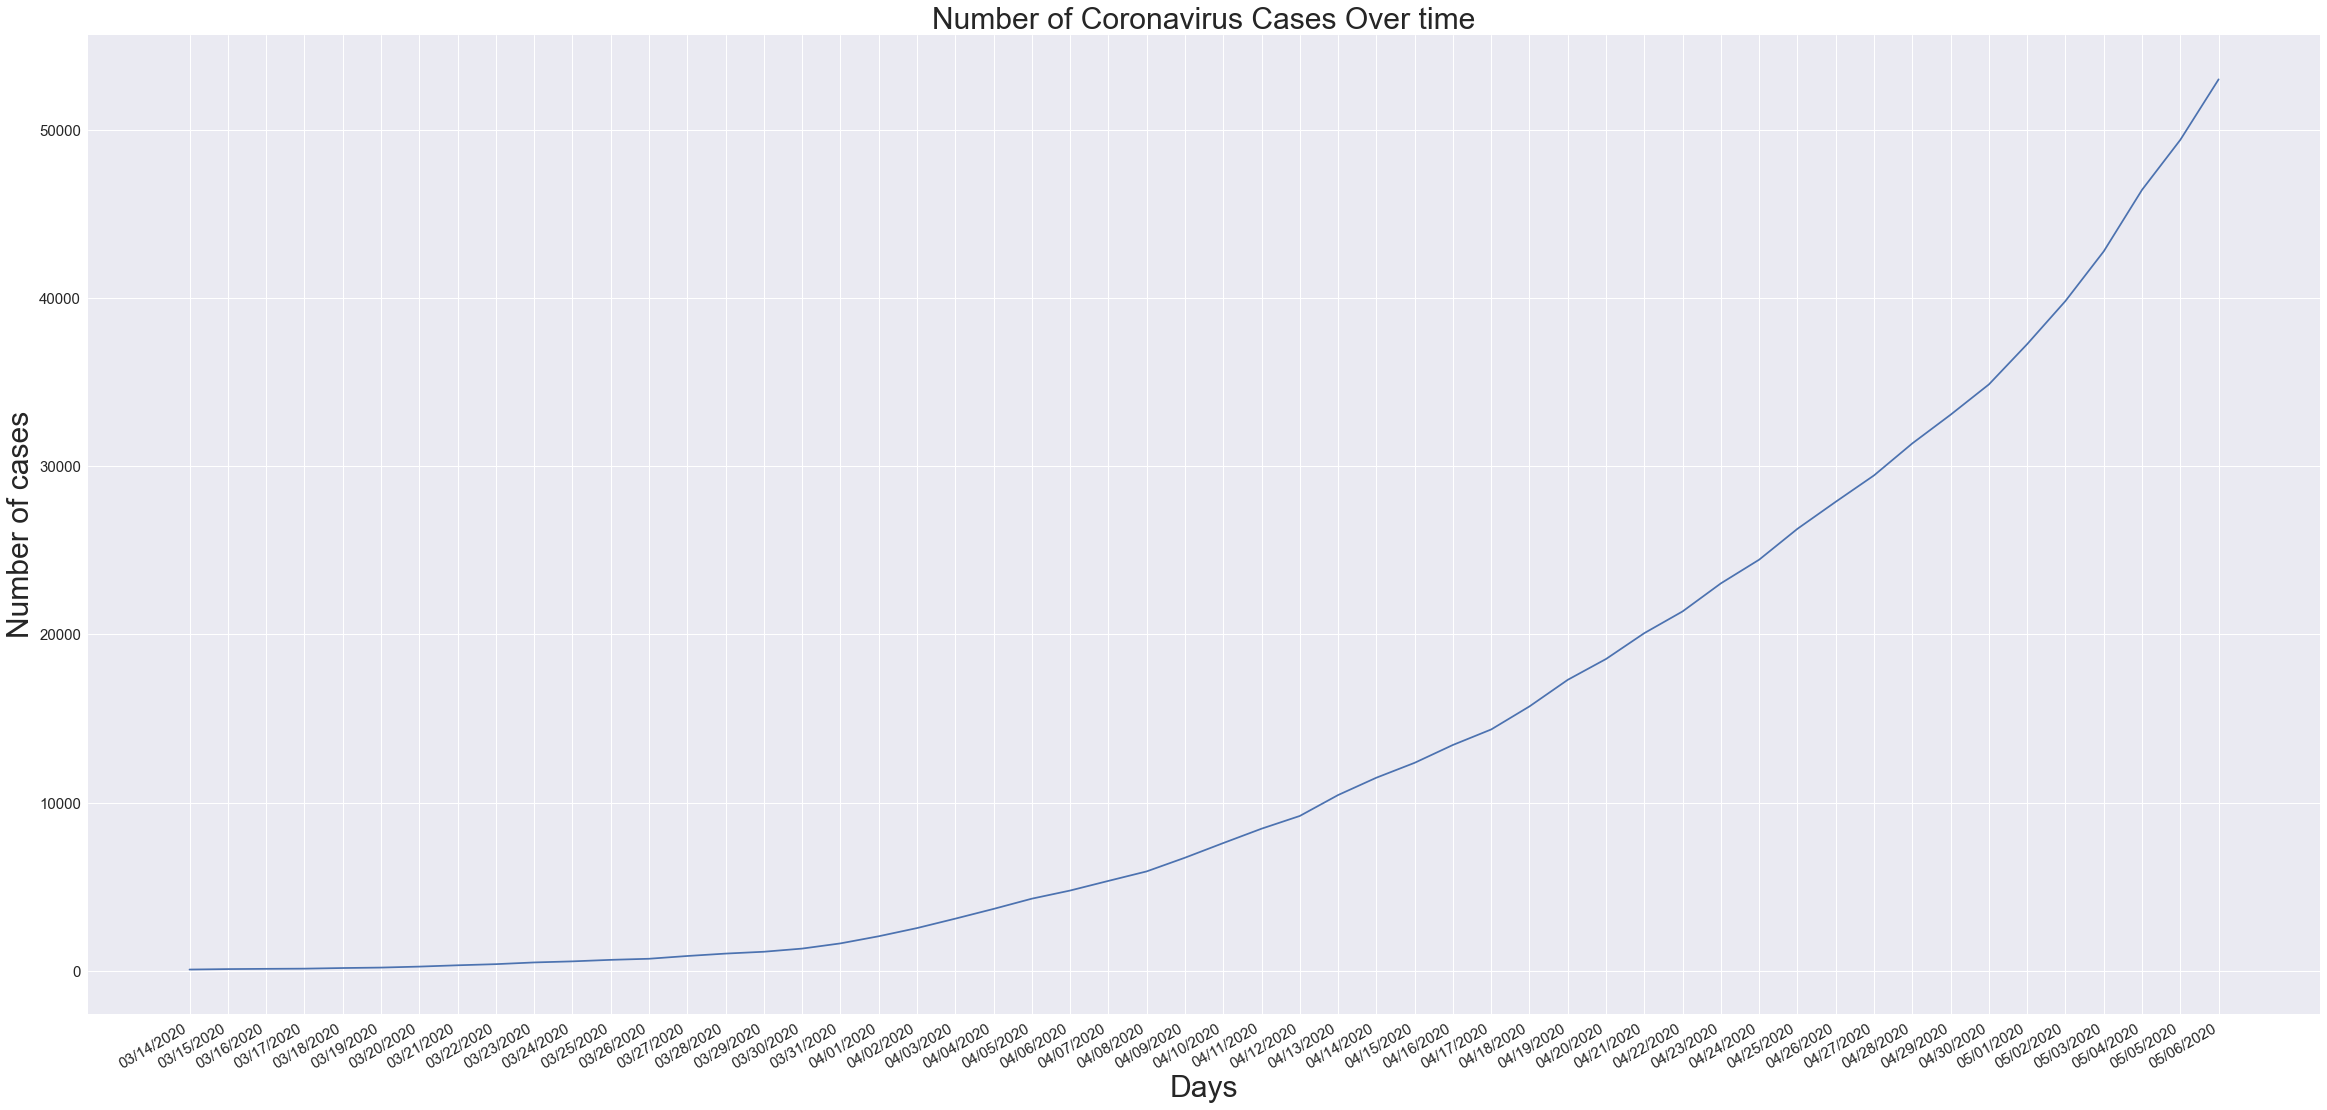

In [26]:
plt.figure(figsize=(40,20))
plt.plot(future_date_plots[:-10], india_cases)
plt.title('Number of Coronavirus Cases Over time', size=30)
plt.xlabel('Days',size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.gcf().autofmt_xdate()
plt.show()

In [40]:
#Splitting train and test data

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_from_14_march, india_cases, test_size=0.16, shuffle=False)

In [41]:
#SVM Model

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score = True, n_jobs = -1, n_iter=40, verbose=1)
model = svm_search.fit(X_train_confirmed, y_train_confirmed)
training_score = svm_search.fit(X_train_confirmed, y_train_confirmed).score(X_train_confirmed, y_train_confirmed)
print('Model: ',model)
print('Training Score',training_score)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   52.1s finished
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Model:  RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'kernel': ['poly', 'sigmoid', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)
Training Score -122242.57064474172


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.0s finished
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.01, 'C': 0.01}

In [43]:
svm_confirmed = svm_search.best_estimator_
svm_confirmed

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.1,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
svm_pred = svm_confirmed.predict(future_forecast)
svm_pred

array([  207.05363991,   207.41357627,   209.93313079,   216.77192164,
         230.08956697,   252.04568495,   284.79989374,   330.51181149,
         391.34105638,   469.44724657,   566.99000021,   686.12893547,
         829.02367051,   997.83382349,  1194.71901258,  1421.83885593,
        1681.3529717 ,  1975.42097807,  2306.20249318,  2675.85713521,
        3086.54452232,  3540.42427266,  4039.65600439,  4586.39933569,
        5182.81388471,  5831.05926961,  6533.29510856,  7291.68101971,
        8108.37662123,  8985.54153128,  9925.33536803, 10929.91774963,
       12001.44829424, 13142.08662004, 14353.99234517, 15639.3250878 ,
       17000.2444661 , 18438.91009822, 19957.48160233, 21558.11859659,
       23242.98069916, 25014.2275282 , 26874.01870187, 28824.51383834,
       30867.87255577, 33006.25447231, 35241.81920614, 37576.72637541,
       40013.13559829, 42553.20649293, 45199.0986775 , 47952.97177016,
       50816.98538907, 53793.2991524 , 56884.0726783 , 60091.46558494,
      

MAE:  2017.4996815809047
MSE:  4510572.865595985


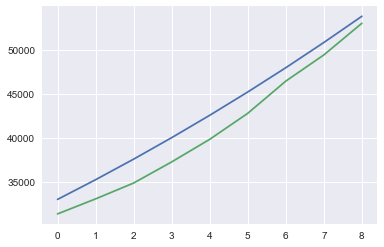

In [45]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE: ',mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE: ',mean_squared_error(svm_test_pred, y_test_confirmed))

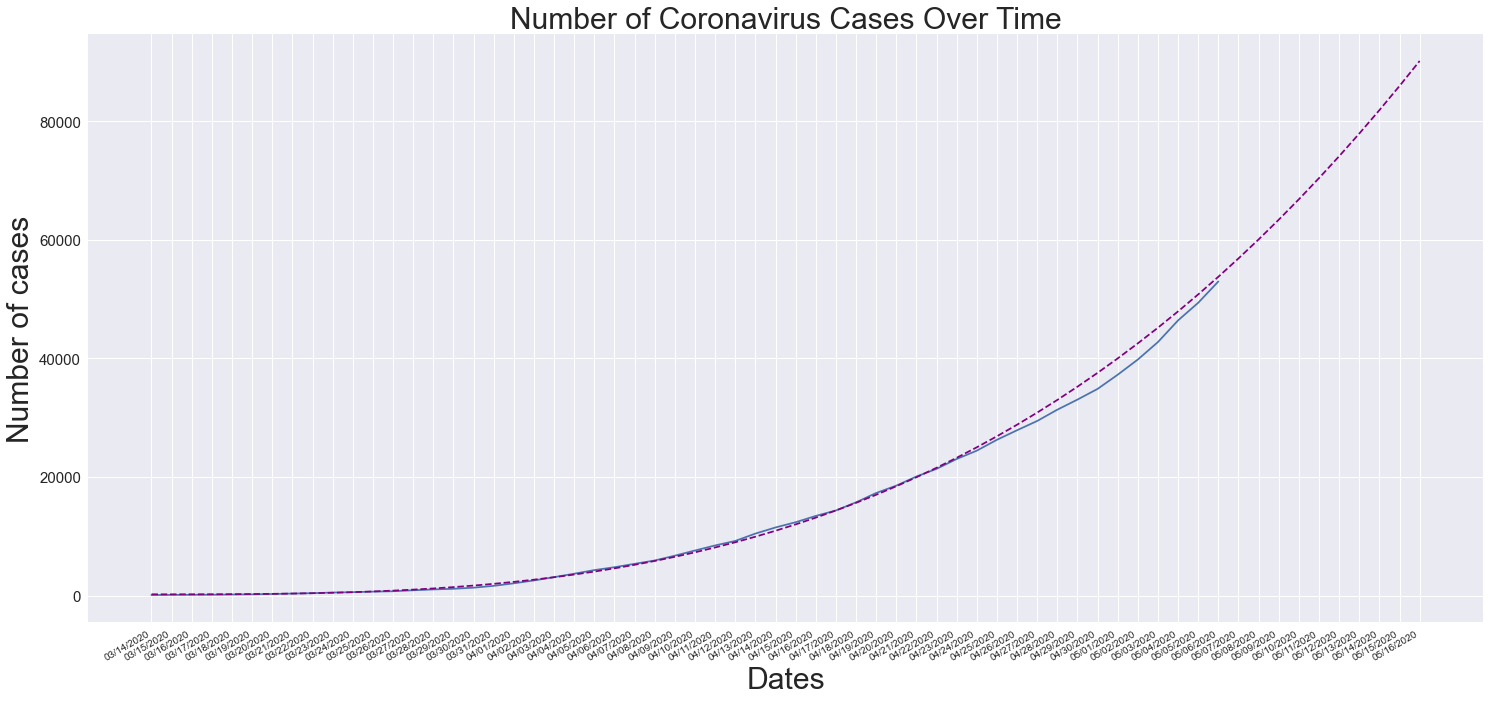

In [46]:
# Actual Confirmed Cases vs. Predicted Confirmed Cases

plt.figure(figsize=(25,12))
plt.plot(future_date_plots[:-10], india_cases)
plt.plot(future_date_plots, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Dates',size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=10)
plt.yticks(size=15)
plt.gcf().autofmt_xdate()
plt.show()

In [47]:
#Predictions for next 10 days

print('SVM Future Predictions: ')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM Future Predictions: 


{('05/07/2020', 56884.07267830427),
 ('05/08/2020', 60091.46558494411),
 ('05/09/2020', 63417.63749048317),
 ('05/10/2020', 66864.7480130833),
 ('05/11/2020', 70434.95677090625),
 ('05/12/2020', 74130.42338211357),
 ('05/13/2020', 77953.3074648676),
 ('05/14/2020', 81905.7686373303),
 ('05/15/2020', 85989.96651766243),
 ('05/16/2020', 90208.06072402673)}

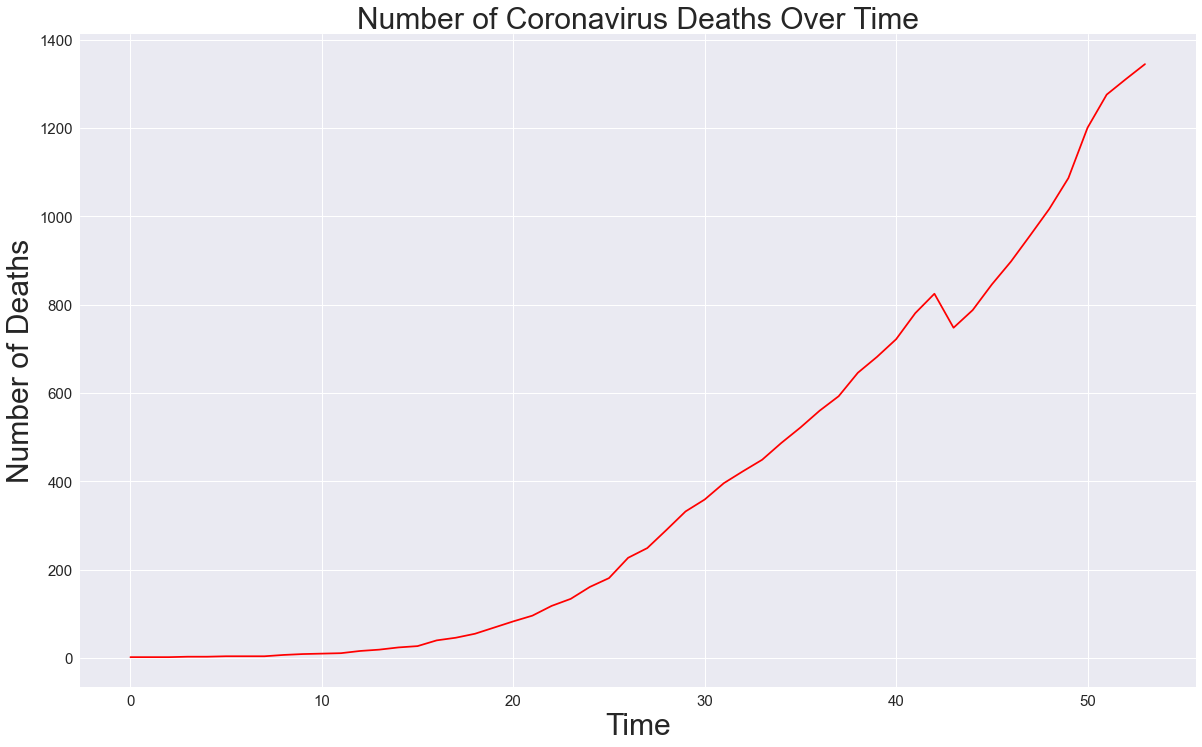

In [48]:
# Total Deaths Over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time',size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

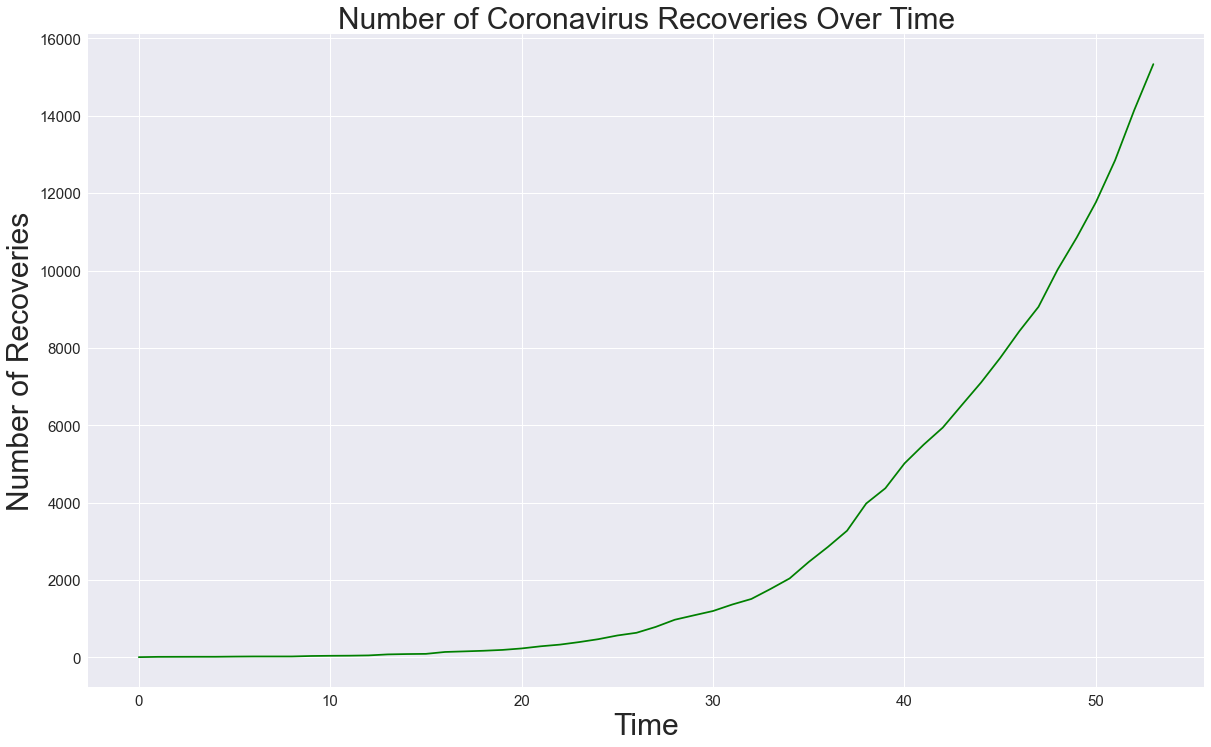

In [49]:
# Total Recovered Over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Recoveries Over Time',size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Recoveries', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

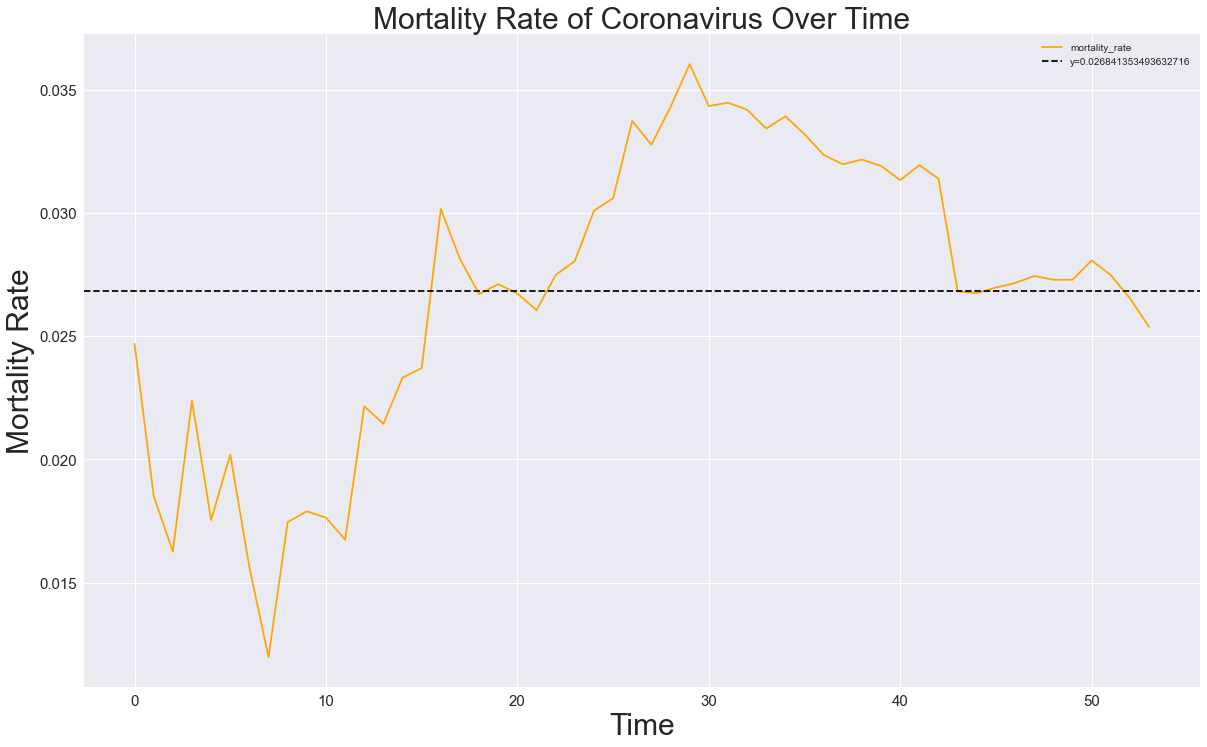

In [50]:
#Mortality Rate

mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y=mean_mortality_rate, linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time',size=30)
plt.legend(['mortality_rate','y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

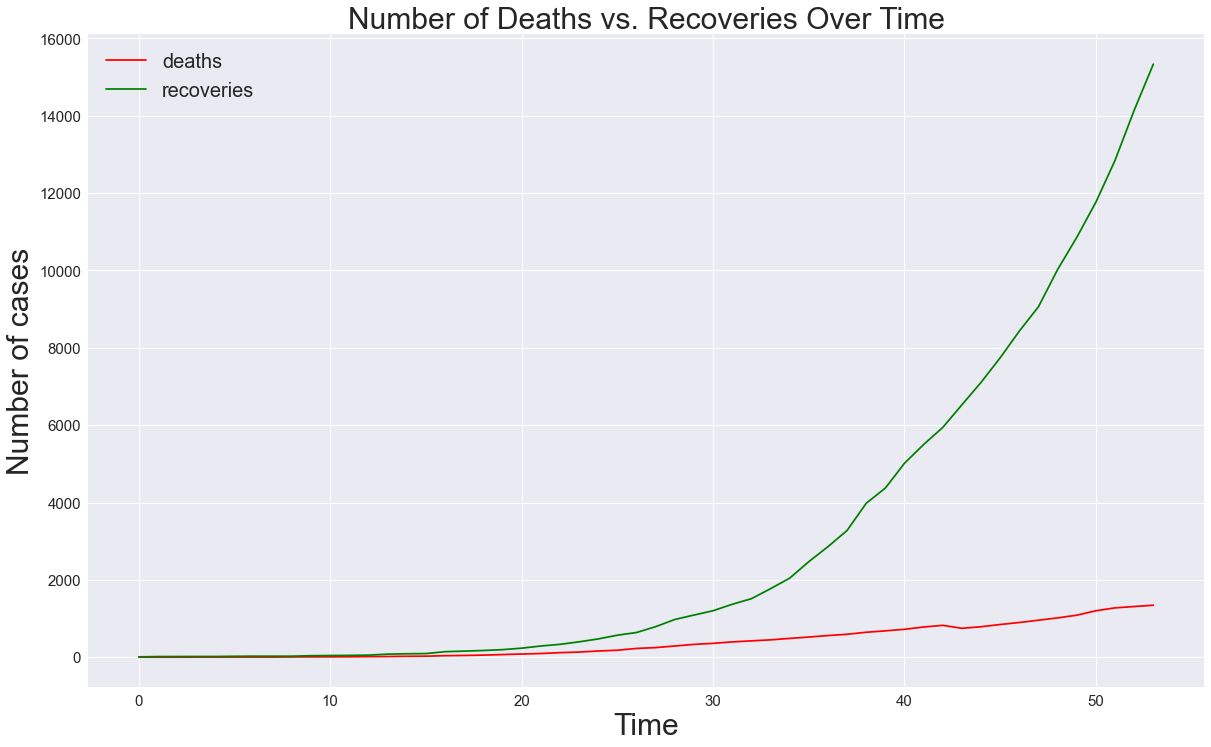

In [51]:
# No. of deaths vs recoveries

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Deaths vs. Recoveries Over Time',size=30)
plt.legend(['deaths','recoveries'],loc='best',fontsize=20)
plt.xlabel('Time', size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()